In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X),len(y)

(50, 50)

In [4]:
train_split = int((0.8 * len(X)))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] ,y[train_split:]

len(X_train), len(X_test)

(40, 10)

In [5]:
def plot_predictions(
    train_features=X_train,train_label=y_train,test_features=X_test,test_label=y_test,predictions=None):

    plt.figure(figsize=(10,5))
    plt.scatter(train_features, train_label, s=10, color="red", label="Train set")

    plt.scatter(test_features, test_label, s=10, color="blue", label="Test set")

    if predictions is not None:
        plt.scatter(test_features,predictions,s=10,color="green",label="Predictions")

    plt.legend(prop={"size":14})

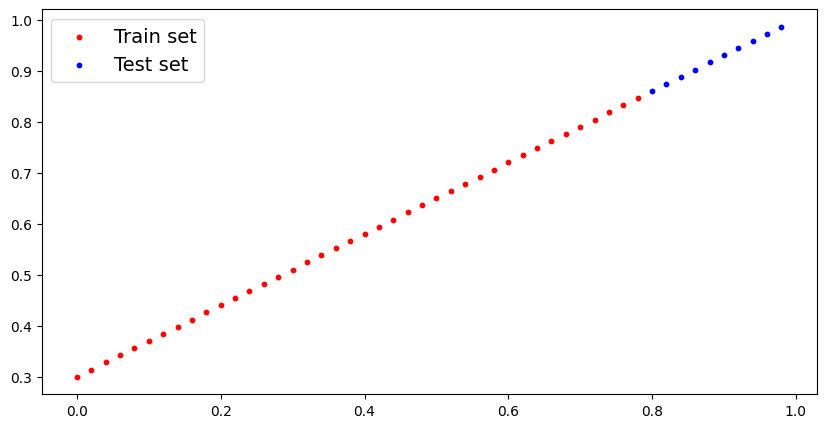

In [6]:
plot_predictions(X_train,y_train,X_test,y_test)

In [7]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self,x):
        return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

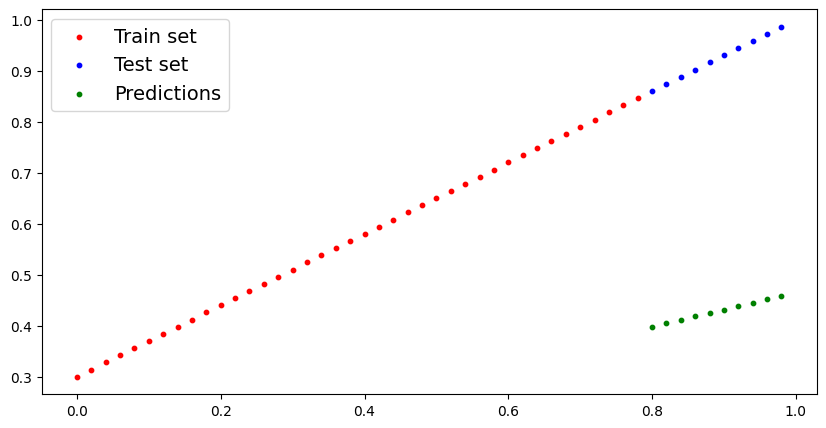

In [9]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    
plot_predictions(test_label=y_test,predictions=y_pred)

In [10]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)

In [11]:
from time import sleep
epochs = 180

epochs_arr = []
train_mae_values = []
test_mae_values = []
for epoch in range(epochs + 1):

    model_0.train()
    ## Perform forward prop
    y_pred = model_0(X_train)

    ## Count loss function
    loss = loss_fn(y_pred,y_train)

    ## Zero grad
    optimizer.zero_grad()

    ## Perform back propagation to search where the error / compute the gradient (kemiringan garis)
    loss.backward()

    ## Perform gradient descant to minimize cost fn
    optimizer.step()

    if epoch % 10 == 0:
        epochs_arr.append(epoch)
        train_mae_values.append(loss.item())

        model_0.eval()
        with torch.inference_mode():
            y_pred_test = model_0(X_test)
            loss_test = loss_fn(y_pred_test,y_test)
            test_mae_values.append(loss_test)
        print(f"Epoch: {epoch} | train loss: {loss} | test loss: {loss_test}")
        sleep(0.2)

Epoch: 0 | train loss: 0.31288138031959534 | test loss: 0.48106518387794495
Epoch: 10 | train loss: 0.1976713240146637 | test loss: 0.3463551998138428
Epoch: 20 | train loss: 0.08908725529909134 | test loss: 0.21729660034179688
Epoch: 30 | train loss: 0.053148526698350906 | test loss: 0.14464017748832703
Epoch: 40 | train loss: 0.04543796554207802 | test loss: 0.11360953003168106
Epoch: 50 | train loss: 0.04167863354086876 | test loss: 0.09919948130846024
Epoch: 60 | train loss: 0.03818932920694351 | test loss: 0.08886633068323135
Epoch: 70 | train loss: 0.03476089984178543 | test loss: 0.0805937647819519
Epoch: 80 | train loss: 0.03132382780313492 | test loss: 0.07232122868299484
Epoch: 90 | train loss: 0.02788739837706089 | test loss: 0.06473556160926819
Epoch: 100 | train loss: 0.024458957836031914 | test loss: 0.05646304413676262
Epoch: 110 | train loss: 0.021020207554101944 | test loss: 0.04819049686193466
Epoch: 120 | train loss: 0.01758546568453312 | test loss: 0.040604822337627

[Parameter containing:
 tensor([0.6951], requires_grad=True),
 Parameter containing:
 tensor([0.2993], requires_grad=True)]

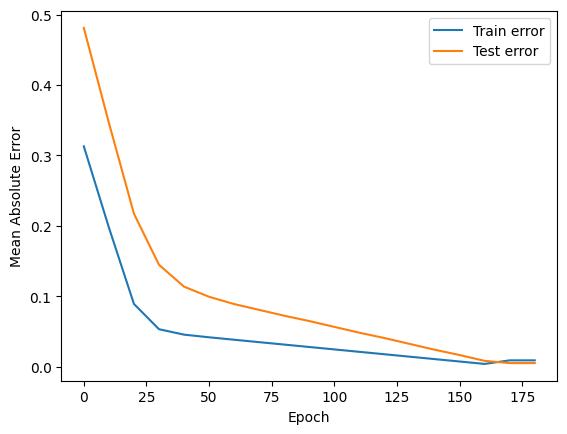

In [12]:
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.plot(epochs_arr, train_mae_values, label="Train error")
plt.plot(epochs_arr, test_mae_values, label="Test error")

plt.legend()
list(model_0.parameters())

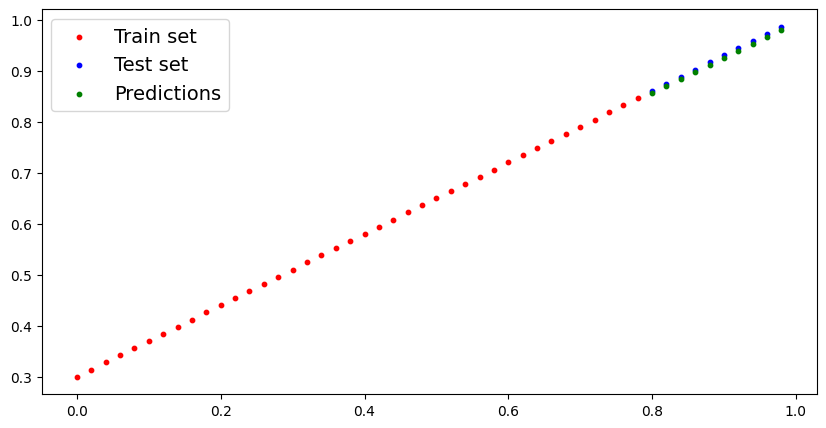

In [13]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    
plot_predictions(predictions=y_pred)

### Saving and Load Model

In [16]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


MODEL_NAME = "01.pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME ## cara 1


torch.save(obj=model_0.state_dict(),f="models/pth_workflow_model_0.pth") ## atau langsung seperti ini
print(f"Success Menyimpan Model ke {MODEL_SAVE_PATH}")

Success Menyimpan Model ke models\01.pytorch_workflow_model_0.pth


In [17]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH,weights_only=True))

<All keys matched successfully>

In [18]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [19]:
loaded_model_0.eval()
with torch.inference_mode():
    y_pred_loaded_model = loaded_model_0(X_test)

y_pred_loaded_model == y_pred_test

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])